<a href="https://colab.research.google.com/github/SundasAshraf/Prediction-of-CO2-Emission/blob/main/Prediction_of_CO2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
sub_data=data[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']]
sub_data.head(5)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
0,2014,2.0,4,9.9
1,2014,2.4,4,11.2
2,2014,1.5,4,6.0
3,2014,3.5,6,12.7
4,2014,3.5,6,12.1


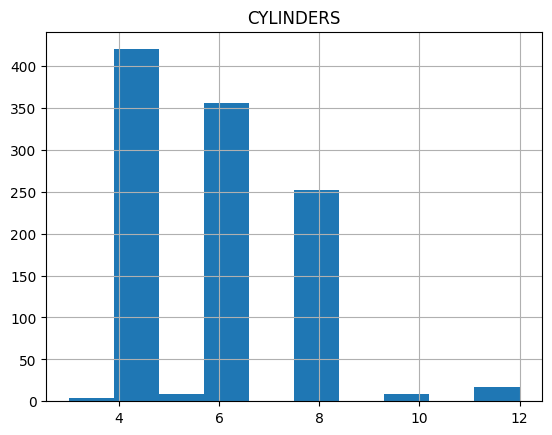

In [ ]:
viz = sub_data[['CYLINDERS']]
viz.hist()

plt.show()

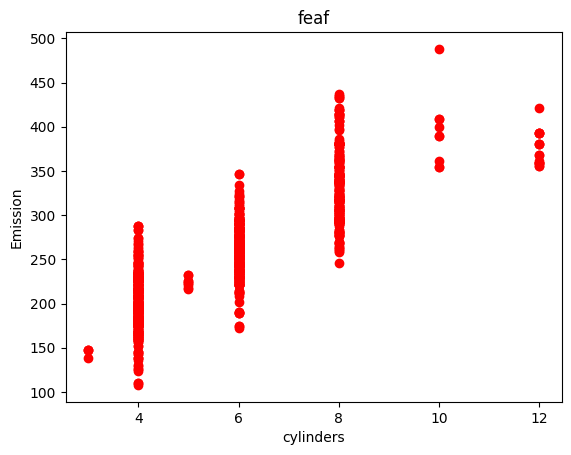

In [ ]:
plt.scatter(data.CYLINDERS,data.CO2EMISSIONS,color='red')
plt.title("feaf")
plt.xlabel("cylinders")
plt.ylabel("Emission")
plt.show()


In [ ]:

print(len(data))
msk = np.random.rand(1067) < 0.8
train = data[msk]
test = data[~msk]


1067


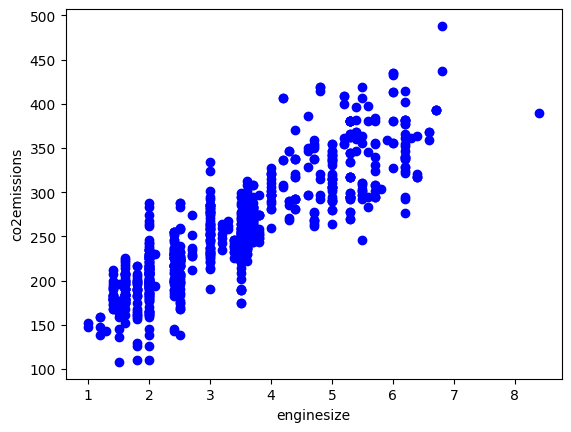

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="blue")
plt.xlabel('enginesize')
plt.ylabel('co2emissions')
plt.show()

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[39.18881233]]
Intercept:  [124.32296041]


Text(0, 0.5, 'Emission')

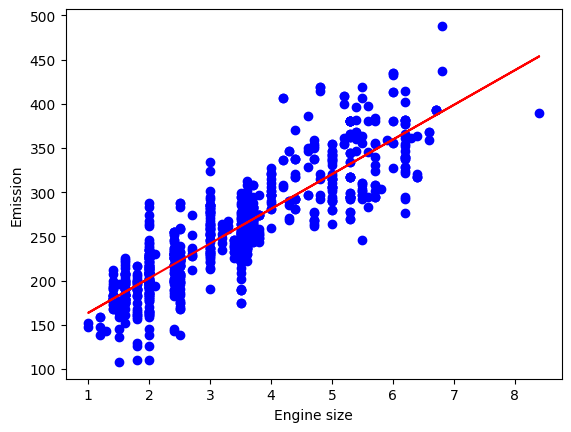

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.93
Residual sum of squares (MSE): 956.20
R2-score: 0.75


In [ ]:
train_x=np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x=np.asanyarray(test[['FUELCONSUMPTION_COMB']])
model.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[16.82635833]]
Intercept:  [62.25796858]


In [ ]:
test_y=model.predict(test_x)
print("mean absolute error: %.2f" %np.mean(np.absolute(test_y-test_y_)))

mean absolute error: 27.37


In [ ]:
mul_train_x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
mul_train_y=np.asanyarray(train[['CO2EMISSIONS']])
mul_test_x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
mul_test_y=np.asanyarray(test[['CO2EMISSIONS']])

In [ ]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(mul_train_x,  mul_train_y)
print('cofficients:', model.coef_)

cofficients: [[11.64357047  5.92610388  6.36557071  3.63184806]]


In [ ]:
predict=model.predict(mul_test_x)
print("Residual sum of squares: %.2f"% np.mean((predict - mul_test_y) ** 2))


Residual sum of squares: 614.75


In [ ]:
print('Variance score: %.2f' % model.score(mul_test_x, mul_test_y))

Variance score: 0.84
